In [1]:
import matplotlib.pyplot as plt
import os 
import sys 
import csv
import numpy as np
import seaborn as sns
import pandas as pd
import scipy
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline

In [2]:
USAGE_STR = """

# Purpose
# Compare the distribution of amino acid sequence conservation for residues
# that are part of the conserved active or inactive state network versus 
# residues that are not. 

"""

In [3]:
def pos_to_conservation(SEQ_CONSERVE_TABLE):
    """
        For positions that are in TM1 through TM 7. Identify the maximimum frequency in 
        the amino acid distribution
    """
    def skip_position(pos):
        if(pos == "None"): return True
        tm, pos = map(int, pos.split("x"))
        if(tm <1 or tm > 7): return True
        if(pos > 99): return True
        return False
        
    
    with open(SEQ_CONSERVE_TABLE, 'rU') as f: 
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    darr = np.array(d)
    column_labels = list(darr[0,:])
    
    pos_to_conserve = {}
    for row in darr[1:]:
        gpcrdb = row[0]
        if(skip_position(gpcrdb) == True): continue
        max_freq = max(map(float, row[1:]))
        pos_to_conserve[gpcrdb] = max_freq
        
    return pos_to_conserve
    
def in_network_residues(l1, l2):
    def get_resi(l):
        f = open(l, 'r')
        network_residues = set()
        for line in f:
            gpcrdb1, gpcrdb2 = line.strip().split("\t")
            network_residues.add(gpcrdb1)
            network_residues.add(gpcrdb2)
        return network_residues
        
    network_residues = get_resi(l1)
    network_residues |= get_resi(l2)
    return network_residues
    
    
# def boxplot(pos_to_conserve, network_residues):
#     in_network_freq = []
#     out_network_freq = []
#     for gpcrdb in pos_to_conserve:
#         freq = pos_to_conserve[gpcrdb]
#         if(gpcrdb in network_residues):
#             print(gpcrdb, freq)
#             in_network_freq.append(freq)
#         else:
#             out_network_freq.append(freq)
    
#     print(len(in_network_freq), len(out_network_freq))
            
#     ### Boxplot
#     plt.figure(figsize = (10,6))
#     labels = ["Conserved Network Residues", "Others"]
#     plt.boxplot([in_network_freq, out_network_freq])
#     plt.xticks(range(1, len(labels) + 1), labels, rotation="horizontal", fontsize=14)
#     plt.title("Distribution of positional residue conservation", fontsize=18)
#     plt.ylabel("Sequence conservation", fontsize=14)

#     return in_network_freq, out_network_freq

def boxplot_seaborne(pos_to_conserve, network_residues):
    position = []
    label = []
    freqs = []
    
    in_network_freq, out_network_freq = [], []
    for gpcrdb in pos_to_conserve:
        freq = pos_to_conserve[gpcrdb]
        position.append(gpcrdb)
        freqs.append(freq)
        if(gpcrdb in network_residues):
            in_network_freq.append(freq)
            label.append("Conserved Network Residues")
        else:
            out_network_freq.append(freq)
            label.append("Others")
    
            
    ### Boxplot
    df = pd.DataFrame({"position": position, "label": label, "freqs": freqs})
    sns.set_style("whitegrid")
    plt.figure(figsize = (9,6))
    ax = sns.boxplot(x="label", y="freqs", data=df, color="White", width=0.3, order = ["Conserved Network Residues", "Others"])
    plt.xticks(rotation=90, fontsize=14)
    plt.title("Distribution of positional residue conservation", fontsize=18)
    plt.ylabel("Sequence conservation", fontsize=14)
    plt.xlabel("")

    return in_network_freq, out_network_freq

def wilcoxan_test(d1, d2):
    s,p = scipy.stats.kruskal(d1,d2)
    print(s,p)

    

In [4]:
SEQ_CONSERVE_TABLE="/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/simulation-analysis/gpcrdb-freq-config/gpcrdb_residue_conservation.txt"
pos_to_conserve = pos_to_conservation(SEQ_CONSERVE_TABLE)

('medians', [0.77459, 0.9959, 0.96311, 0.69421, 0.38272, 0.73251, 0.77459, 0.33333, 0.45041, 0.90909, 0.77686, 0.22727, 0.97131], [0.22131, 0.2582, 0.18852, 0.27869, 0.2377, 0.37295, 0.22951, 0.18033, 0.23967, 0.39344, 0.7418, 0.1875, 0.1875, 0.29098, 0.24402, 0.11043, 0.26667, 0.34211, 0.12883, 0.13571, 0.12308, 0.2, 0.23077, 0.18182, 0.17647, 0.30769, 0.30328, 0.39754, 0.20082, 0.37295, 0.31557, 0.56967, 0.56967, 0.63934, 0.34016, 0.38115, 0.28689, 0.40984, 0.42213, 0.25, 0.95902, 0.31148, 0.35656, 0.88525, 0.34025, 0.16034, 0.13675, 0.3, 0.57787, 0.92213, 0.7623, 0.32787, 0.4959, 0.38525, 0.35656, 0.13525, 0.2582, 0.19262, 0.2377, 0.2459, 0.58607, 0.68443, 0.34426, 0.19262, 0.29918, 0.25, 0.65164, 0.2623, 0.21721, 0.21721, 0.18443, 0.14754, 0.22131, 0.15164, 0.32569, 0.17857, 0.59244, 0.13636, 0.32877, 0.28689, 0.36885, 0.68443, 0.57377, 0.2418, 0.63115, 0.37705, 0.20082, 0.42623, 0.19262, 0.71193, 0.36214, 0.25926, 0.32922, 0.44033, 0.34979, 0.73251, 0.20988, 0.71311, 0.31557, 0.34

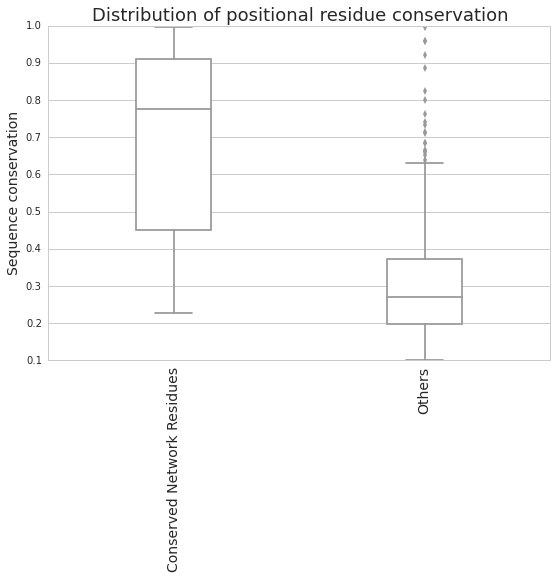

In [5]:
ACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/active-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
INACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/inactive-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
network_residues = in_network_residues(ACTIVE_LIST, INACTIVE_LIST)
in_network_freq, out_network_freq =  boxplot_seaborne(pos_to_conserve, network_residues)
# print("medians", in_network_freq, out_network_freq)
wilcoxan_test(in_network_freq, out_network_freq)

In [6]:
in_network_median = np.median(in_network_freq)
print ("in median", in_network_median)
out_network_median = np.median(out_network_freq)
print ("out median", out_network_median)

('in median', 0.77459)
('out median', 0.26956999999999998)


In [7]:
def get_interactions(f1):
    f = open(f1, 'r')
    interactions = set()
    for line in f:
        gpcrdb1, gpcrdb2 = line.strip().split("\t")
        interactions.add((gpcrdb1, gpcrdb2))
    return interactions
        

In [8]:
ACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/active-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
INACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/inactive-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
i1 = get_interactions(ACTIVE_LIST)
i2 = get_interactions(INACTIVE_LIST)
all_interaction = i1 | i2
print all_interaction
print(len(all_interaction))

set([('6x40', '7x45'), ('2x50', '7x53'), ('5x58', '7x53'), ('6x40', '7x49'), ('7x45', '7x53'), ('6x47', '7x37'), ('3x50', '7x52'), ('3x43', '7x53'), ('1x50', '2x50'), ('3x43', '5x58'), ('6x40', '7x53'), ('1x50', '7x53'), ('6x47', '6x51'), ('7x49', '7x53'), ('6x51', '7x37'), ('7x45', '7x49')])
16


In [9]:
# print(len(i1))
# ac = set()
# for a, b in i1:
#     ac.add(a)
#     ac.add(b)
# print(ac, len(ac))


print(len(i2))
inac = set()
for a,b in i2:
    inac.add(a)
    inac.add(b)
print(inac, len(inac))

7
(set(['6x51', '1x50', '2x50', '7x53', '7x49', '7x45', '6x47', '7x37']), 8)


In [ ]:
# Class A missense mutation box plot 

In [51]:
MISSENSE_FILE="/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/simulation-analysis/gpcrdb-freq-config/classA_human_missense_mutations.txt"

def calc_pos_to_snpcount(MISSENSE_FILE, mode="snp"):
    """
        Return: {"1x50": 20, "2x50": 23, ...}
        Mapping from position to number of missense mutations 
    """
    f = open(MISSENSE_FILE, 'r')
    pos_to_snpcount_dict = {} # {1x50: number of rows}
    pos_to_weighted_snpcount_dict = {} # {1x50: sum of allele freqs}
    
    for line in f:
        linfo = line.strip().split("\t")
        gpcrdb = linfo[2]
        allele_freq = float(linfo[-1])
        
        if(gpcrdb == "None"):continue
        # snpcount_dict
        if(gpcrdb not in pos_to_snpcount_dict):
            pos_to_snpcount_dict[gpcrdb] = 1
        else:
            pos_to_snpcount_dict[gpcrdb] += 1
        
        # snpcount_dict weighted by allele freq
        if(gpcrdb not in pos_to_weighted_snpcount_dict):
            pos_to_weighted_snpcount_dict[gpcrdb] = allele_freq
        else:
            pos_to_weighted_snpcount_dict[gpcrdb] += allele_freq
            
    if(mode == "snp"):
        return pos_to_snpcount_dict
    elif(mode == "allele"):
        return pos_to_weighted_snpcount_dict
        
        
def snp_boxplot_seaborne(pos_to_snpcount, network_residues):
    position = []
    label = []
    freqs = []
    
    in_network_freq, out_network_freq = [], []
    for gpcrdb in pos_to_snpcount:
        freq = pos_to_snpcount[gpcrdb]
        position.append(gpcrdb)
        freqs.append(freq)
        if(gpcrdb in network_residues):
            in_network_freq.append(freq)
            label.append("Conserved Network Residues")
        else:
            out_network_freq.append(freq)
            label.append("Others")
    
            
    ### Boxplot
    df = pd.DataFrame({"position": position, "label": label, "freqs": freqs})
    sns.set_style("whitegrid")
    plt.figure(figsize = (9,6))
    ax = sns.boxplot(x="label", y="freqs", data=df, color="White", width=0.3, order = ["Conserved Network Residues", "Others"])
    plt.xticks(rotation=90, fontsize=14)
    plt.title("Distribution of positional residue missense mutation rate", fontsize=18)
    plt.ylabel("SNP Count", fontsize=14)
    plt.xlabel("")
    
    return in_network_freq, out_network_freq



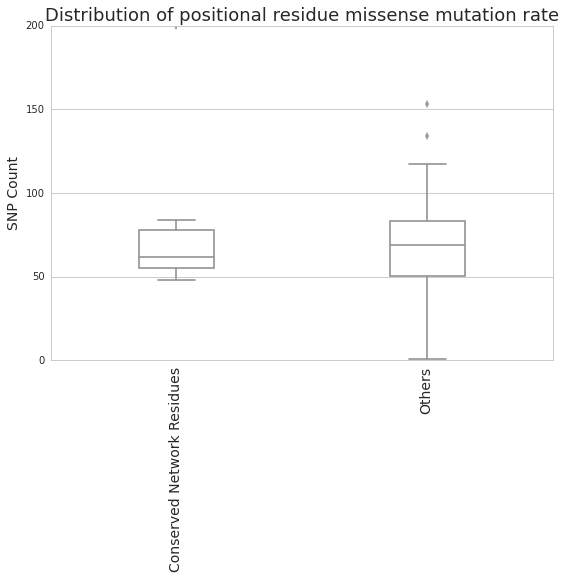

In [52]:
ACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/active-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
INACTIVE_LIST = "/scratch/PI/rondror/akma327/DynamicNetworks/data/crystal-analysis/competing-network-analysis/pymol-visualization/040417/inactive-heatmap/01-pdb/interaction_list_sim_cutoff60_ALL.txt"
network_residues = in_network_residues(ACTIVE_LIST, INACTIVE_LIST)
pos_to_snpcount = calc_pos_to_snpcount(MISSENSE_FILE, "snp")
in_network_freq, out_network_freq =  snp_boxplot_seaborne(pos_to_snpcount, network_residues)


In [58]:
print(in_network_freq)
print(out_network_freq)
wilcoxan_test(in_network_freq, out_network_freq)

in_network_median = np.median(in_network_freq)
print ("in median", in_network_median)
out_network_median = np.median(out_network_freq)
print ("out median", out_network_median)

[55, 52, 58, 84, 76, 52, 59, 64, 48, 78, 62, 82, 200]
[63, 67, 96, 97, 69, 79, 72, 62, 16, 93, 66, 68, 59, 6, 100, 61, 90, 21, 17, 13, 61, 52, 26, 21, 11, 5, 21, 50, 40, 9, 75, 39, 85, 49, 65, 61, 61, 80, 41, 89, 83, 153, 45, 81, 65, 46, 72, 106, 49, 68, 88, 92, 75, 76, 51, 93, 63, 62, 77, 64, 90, 95, 2, 106, 76, 68, 6, 86, 112, 74, 72, 42, 72, 62, 88, 73, 54, 84, 94, 83, 74, 1, 63, 80, 72, 68, 55, 93, 76, 56, 61, 74, 65, 76, 69, 49, 82, 73, 3, 60, 61, 56, 80, 68, 52, 80, 5, 92, 71, 70, 78, 83, 61, 89, 45, 71, 6, 48, 84, 77, 78, 39, 56, 78, 71, 61, 73, 85, 67, 91, 19, 72, 56, 31, 21, 1, 17, 19, 84, 75, 81, 64, 26, 112, 74, 64, 85, 90, 87, 96, 53, 91, 66, 7, 69, 45, 61, 57, 101, 75, 88, 68, 97, 114, 74, 69, 43, 6, 45, 38, 42, 50, 39, 71, 81, 3, 101, 88, 94, 102, 5, 81, 71, 69, 47, 81, 62, 63, 75, 103, 90, 73, 58, 79, 102, 60, 103, 75, 93, 103, 91, 69, 92, 110, 90, 58, 80, 99, 75, 85, 77, 13, 87, 59, 85, 104, 50, 68, 74, 64, 57, 62, 69, 7, 84, 74, 15, 44, 59, 114, 94, 9, 63, 56, 15, 39, 

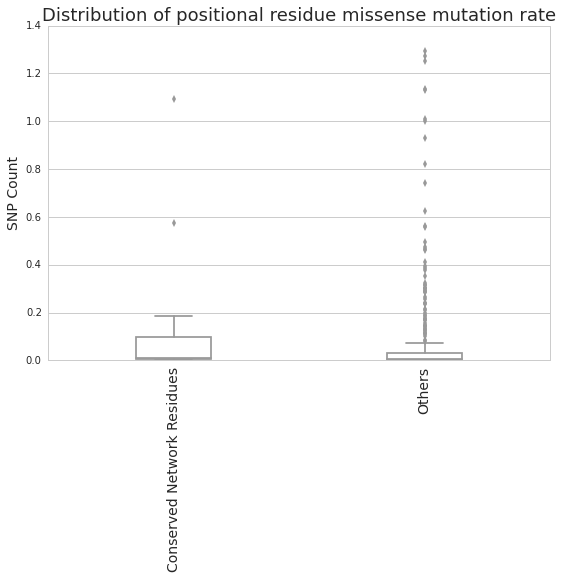

In [38]:
pos_to_snpallelefreq = calc_pos_to_snpcount(MISSENSE_FILE, "allele")
snp_boxplot_seaborne(pos_to_snpallelefreq, network_residues)


In [39]:
pos_to_snpallelefreq

{'12x48': 0.003044000000000002,
 '12x49': 0.6235260000000007,
 '12x50': 0.2922460000000001,
 '12x51': 0.3013920000000003,
 '12x52': 0.1883580000000001,
 '1x23': 0.0019730000000000004,
 '1x24': 0.000125,
 '1x25': 0.000266,
 '1x26': 0.011331999999999997,
 '1x27': 0.0010809999999999997,
 '1x28': 0.0015969999999999997,
 '1x29': 0.02183800000000002,
 '1x30': 0.31304100000000024,
 '1x31': 0.006076000000000002,
 '1x32': 0.014518,
 '1x33': 0.005866000000000008,
 '1x34': 0.005098000000000002,
 '1x35': 0.012783,
 '1x36': 0.26332300000000036,
 '1x37': 0.011405000000000012,
 '1x38': 0.009101999999999994,
 '1x39': 0.014597999999999984,
 '1x40': 0.03752400000000001,
 '1x41': 0.024804000000000014,
 '1x411': 9.9e-05,
 '1x42': 0.0033350000000000016,
 '1x43': 0.0017199999999999995,
 '1x44': 0.07032299999999998,
 '1x45': 0.9278210000000001,
 '1x46': 0.008184000000000002,
 '1x47': 0.007151000000000002,
 '1x48': 0.17740799999999995,
 '1x49': 0.04294700000000006,
 '1x50': 0.1863390000000001,
 '1x51': 0.3850